# Introduction

Examining the relationship between variables can give us key insight into our data. In this lesson, we will cover ways of assessing the association between a quantitative variable and a categorical variable.

In the next few exercises, we will explore a dataset that contains the following information about students at two portuguese schools:

* `school`: the school each student attends, Gabriel Periera (`'GP'`) or Mousinho da Silveria (`'MS'`)
* `address`: the location of the student's home (`'U'` for urban and `'R'` for rural)
* `absences`: the number of times the student was absent during the school year
* `Mjob`: the student's mother's job industry
* `Fjob`: the student's father's job industry
* `G3`: the student's score on a math assessment, ranging from 0 to 20

Suppose we want to know: Is a student's score (`G3`) associated with their school (`school`)? If so, then knowing what school a student attends gives us information about what their score is likely to be. For example, maybe students at one of the schools consistently score higher than students at the other school.

To start answering this question, it is useful to save scores from each school in two separate lists:

        scores_GP = students.G3[students.school == 'GP']
        scores_MS = students.G3[students.school == 'MS']

### Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

students = pd.read_csv('students.csv')

1. The dataset described above has been saved for you in the workspace as a Pandas dataframe named `students`. Inspect the first five rows of `students` using the `.head()` method. Take a look at the other columns. Which are categorical and which are quantitative?

In [2]:
students.head()

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10
3,GP,U,2,health,services,15
4,GP,U,4,other,other,10


2. Suppose that we want to know whether there is an association between student math scores (`G3`) and the student's `address` (urban or rural). Separate out `G3` scores into two separate lists: one for students who live in an urban location (`'U'`) and one for students who live in a rural location (`'R'`). Name these lists `scores_urban` and `scores_rural`

In [3]:
scores_urban = students.G3[students.address == 'U']
scores_rural = students.G3[students.address == 'R']

***

## Mean and Median Differences

Recall that in the last exercise, we began investigating whether or not there is an association between math scores and the school a student attends. We can begin quantifying this association by using two common summary statistics, mean and median differences. To calculate the difference in mean G3 scores for the two schools, we can start by finding the mean math score for students at each school. We can then find the difference between them:

    mean_GP = np.mean(scores_GP)
    mean_MS = np.mean(scores_MS)
    print(mean_GP) #output: 10.49
    print(mean_MS) #output: 9.85
    print(mean_GP - mean_MS) #Output: 0.64

We see that the mean math score for students at GP is 10.49, while the mean score for students at MS is 9.85. The mean difference is 0.64. We can follow a similar process to calculate a median difference:

    median_GP = np.median(scores_GP)
    median_MS = np.median(scores_MS)
    print(median_GP) #Output: 11.0
    print(median_MS) #Output: 10.0
    print(median_GP-median_MS) #Output: 1.0

GP students also have a higher median score, by one point. Highly associated variables tend to have a large mean or median difference. Since "large" could have different meanings depending on the variable, we will go into more detail in the next exercise.

1. Use these lists from the previous exercise (`scores_urban` and `scores_rural`) to calculate the mean score for both groups. Store the results as `scores_urban_mean` and `scores_rural_mean`, respectively.

In [4]:
#calculate means for each group:
scores_urban_mean = scores_urban.mean()
scores_rural_mean = scores_rural.mean()

#print mean scores:
print('Mean score - students w/ urban address:')
print(round(scores_urban_mean, 1))
print('Mean score - students w/ rural address:')
print(round(scores_rural_mean, 1))

Mean score - students w/ urban address:
10.7
Mean score - students w/ rural address:
9.5


2. Calculate the mean difference between the two groups and save the result as `mean_diff`. Based on this number, do you think the variables are associated? Why or why not?

In [5]:
#calculate mean difference:
mean_diff = scores_urban_mean - scores_rural_mean

#print mean difference
print('Mean difference:')
print(round(mean_diff, 1))

Mean difference:
1.2


3. Use the lists to calculate the median score for both groups. Store the results as `scores_urban_median`, `scores_rural_median`, respectively. Print out the result of each variable.

In [6]:
#calculate medians for each group:
scores_urban_median = scores_urban.median()
scores_rural_median = scores_rural.median()

#print median scores
print('Median score - students w/ urban address:')
print(scores_urban_median)
print('Median score - students w/ rural address:')
print(scores_rural_median)

Median score - students w/ urban address:
11.0
Median score - students w/ rural address:
10.0


4. Calculate the median difference between the two groups, save the result as `median_diff`. Based on this value, do you think the variables are associated? Why or why not?

In [7]:
#calculate median difference
median_diff = scores_urban_median - scores_rural_median

#print median difference
print('Median difference:')
print(median_diff)

Median difference:
1.0


***

## Side-by-Side Box Plots

The difference in mean math scores for students at GP and MS was 0.64. How do we know whether this difference is considered small or large? To answer this question, we need to know something about the spread of the data.

One way to get a better sense of spread is by looking at a visual representation of the data. Side-by-side box plots are useful in visualizing mean and median differences because they allow us to visually estimate the variation in the data. This can help us determine if mean or median differences are "large" or "small".

Let us take a look at side by side boxplots of math scores at each school:

    sns.boxplot(data = df, x = 'school', y = 'G3')
    plt.show()

<img src="https://static-assets.codecademy.com/Courses/Hypothesis-Testing/school_boxplots.svg" alt="Boxplot 1" style="background-color:white;"></img>

Looking at the plot, we can clearly see that there is a lot of overlap between the boxes (i.e. the middle 50% of the data). Therefore, we can be more confident that there is not much difference between the math scores of the two groups.

In contrast, suppose we saw the following plot:

<img src="https://static-assets.codecademy.com/Courses/Hypothesis-Testing/fake_school_boxplots.svg" alt="Boxplot 2" style="background-color:white;"></img>

In this version, the boxes barely overlap, demonstrating that the middle 50% of scores are different for the two schools. This would be evidence of a stronger association between school and math score.

### Exercise
1. Generate side-by-side boxplots for student scores (`G3`) by `address`. Is there any overlap between the boxes? Do you think the variables are associated?

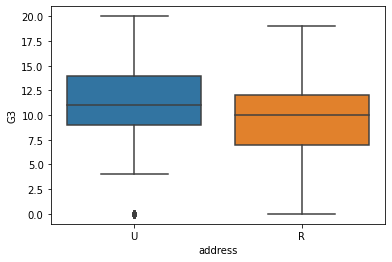

In [8]:
sns.boxplot(data=students, x='address', y='G3')
plt.show()

***

## Inspecting Overlapping Histograms

Another way to explore the relationship between a quantitative and categorical variable in more detail is by inspecting overlapping histograms. In the code below, setting alpha = .5 ensures that the histograms are see-through enough that we can see both of them at once. We have also used normed=True make sure that the y-axis is a density rather than a frequency (note: the newest version of matplotlib renamed this parameter density instead of normed):

    plt.hist(scores_GP , color="blue", label="GP", normed=True, alpha=0.5)
    plt.hist(scores_MS , color="red", label="MS", normed=True, alpha=0.5)
    plt.legend()
    plt.show()

<img src="https://static-assets.codecademy.com/Courses/Hypothesis-Testing/overlapping_dens.svg" alt="Normed Overlapping Histogram" style="background-color:white;"></img>

By inspecting this histogram, we can clearly see that the entire distribution of scores at GP (not just the mean or median) appears slightly shifted to the right (higher) compared to the scores at MS. However, there is also still a lot of overlap between the scores, suggesting that the association is relatively weak.

Note that there are only 46 students at MS, but there are 349 students at GP. If we hadn’t used normed = True, our histogram would have looked like this, making it impossible to compare the distributions fairly:

<img src="https://static-assets.codecademy.com/Courses/Hypothesis-Testing/overlapping_freq.svg" alt="Overlapping Histogram" style="background-color:white;"></img>
title

While overlapping histograms and side by side boxplots can convey similar information, histograms give us more detail and can be useful in spotting patterns that were not visible in a box plot (eg., a bimodal distribution). For example, the following set of box plots and overlapping histograms illustrate the same hypothetical data:

<img src="https://static-assets.codecademy.com/Courses/Hypothesis-Testing/fake_school_boxplots_and_hist.svg" alt="Boxplot and Normed Overlapping Histogram" style="background-color:white;"></img>
title

While the box plots and means/medians appear similar, the overlapping histograms illuminate the differences between these two distributions of scores.